In [1]:
# Install kaggle library
!pip install kaggle

In [2]:
# Upload kaggle credential
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [3]:
# Prepare kaggle environment
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download dataset
!kaggle datasets download -d kaustubhb999/tomatoleaf

Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf
License(s): CC0-1.0
100% 178M/179M [00:07<00:00, 30.8MB/s]
100% 179M/179M [00:07<00:00, 26.1MB/s]


In [5]:
!unzip tomatoleaf.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe

In [6]:
!ls /content/

sample_data  tomato  tomatoleaf.zip


In [7]:
!unzip /content/tomatoleaf.zip -d /content/tomatoleaf

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/tomatoleaf/tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: /content/tomatoleaf/tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: /content/tomatoleaf/tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: /content/tomatoleaf/tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: /content/tomatoleaf/tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: /content/tomatoleaf/tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: /content/tomatoleaf/tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: /content/tomatol

In [8]:
!ls /content/tomatoleaf

tomato


In [9]:
import os
import pandas as pd

base_path = "/content/tomatoleaf/tomato/train"

# Getting categories from folder
categories = [f"{base_path}/{folder}" for folder in os.listdir(base_path) if os.path.isdir(f"{base_path}/{folder}")]

# Getting raw data from folder path
rows = []

for category in categories:
  images_path = [f"{category}/{file}" for file in os.listdir(category)]

  for image_path in images_path:
    rows.append([category.split("/")[-1], image_path])

columns = ["CATEGORY", "IMAGE_PATH"]

df = pd.DataFrame(rows, columns=columns)
df


,CATEGORY,IMAGE_PATH
0,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...
1,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...
3,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...
4,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...
...,...,...
9995,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...
9996,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...
9997,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...
9998,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...


In [10]:
# Getting basic statistic

import cv2
import numpy as np

images_path = df["IMAGE_PATH"].values.tolist()
medians_images = []

for image_path in images_path:
  gray_image = cv2.imread(image_path, 0)
  resized_image = cv2.resize(gray_image, (256, 256))
  medians_images.append([image_path, np.median(resized_image)])

df_medians = pd.DataFrame(medians_images, columns=["IMAGE_PATH", "MEDIAN"])
df_medians

,IMAGE_PATH,MEDIAN
0,/content/tomatoleaf/tomato/train/Tomato___Toma...,116.0
1,/content/tomatoleaf/tomato/train/Tomato___Toma...,141.0
2,/content/tomatoleaf/tomato/train/Tomato___Toma...,102.0
3,/content/tomatoleaf/tomato/train/Tomato___Toma...,118.0
4,/content/tomatoleaf/tomato/train/Tomato___Toma...,103.0
...,...,...
9995,/content/tomatoleaf/tomato/train/Tomato___Sept...,157.0
9996,/content/tomatoleaf/tomato/train/Tomato___Sept...,142.0
9997,/content/tomatoleaf/tomato/train/Tomato___Sept...,126.0
9998,/content/tomatoleaf/tomato/train/Tomato___Sept...,128.0


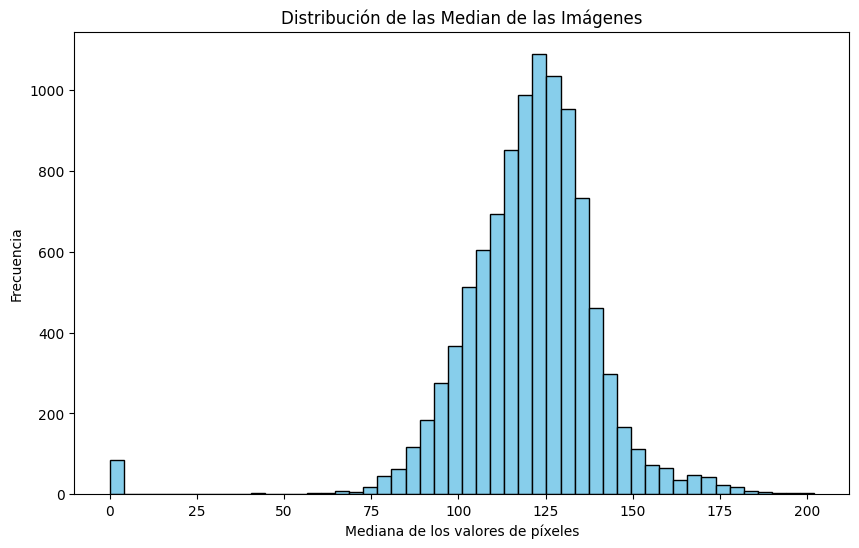

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_medians["MEDIAN"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribución de las Median de las Imágenes")
plt.xlabel("Mediana de los valores de píxeles")
plt.ylabel("Frecuencia")
plt.show()

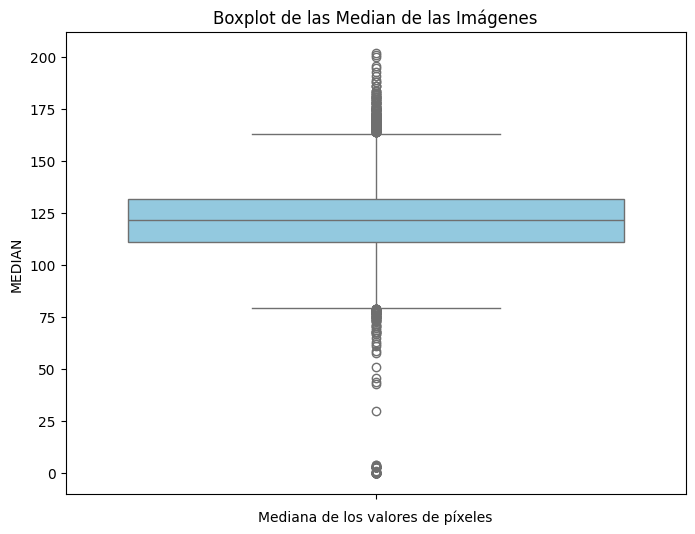

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df_medians["MEDIAN"], color='skyblue')
plt.title("Boxplot de las Median de las Imágenes")
plt.xlabel("Mediana de los valores de píxeles")
plt.show()

In [13]:
# Cálculo de los cuartiles y el IQR
Q1 = df_medians['MEDIAN'].quantile(0.25)
Q3 = df_medians['MEDIAN'].quantile(0.75)
IQR = Q3 - Q1

# Definir los umbrales para detectar outliers
low_limit = Q1 - 1.5 * IQR
high_limit = Q3 + 1.5 * IQR

print(f"Quartil 1: {Q1}")
print(f"Quartil 3: {Q3}")
print(f"IQR: {IQR}")
print(f"Criteria filtering low: {low_limit}")
print(f"Criteria filtering high: {high_limit}")

# Detectar outliers
outliers_df = df_medians[ (df_medians['MEDIAN'] < low_limit) | (df_medians['MEDIAN'] > high_limit) ]

# Ver los outliers
print("Outliers detectados:")
print(outliers_df)

Quartil 1: 111.0
Quartil 3: 132.0
IQR: 21.0
Criteria filtering low: 79.5
Criteria filtering high: 163.5
Outliers detectados:
                                             IMAGE_PATH  MEDIAN
13    /content/tomatoleaf/tomato/train/Tomato___Toma...   180.0
24    /content/tomatoleaf/tomato/train/Tomato___Toma...   166.0
54    /content/tomatoleaf/tomato/train/Tomato___Toma...   164.0
64    /content/tomatoleaf/tomato/train/Tomato___Toma...    79.0
86    /content/tomatoleaf/tomato/train/Tomato___Toma...   173.0
...                                                 ...     ...
9956  /content/tomatoleaf/tomato/train/Tomato___Sept...   166.0
9957  /content/tomatoleaf/tomato/train/Tomato___Sept...   165.0
9971  /content/tomatoleaf/tomato/train/Tomato___Sept...   178.0
9977  /content/tomatoleaf/tomato/train/Tomato___Sept...   166.0
9978  /content/tomatoleaf/tomato/train/Tomato___Sept...   172.0

[321 rows x 2 columns]


There are 157 outliers


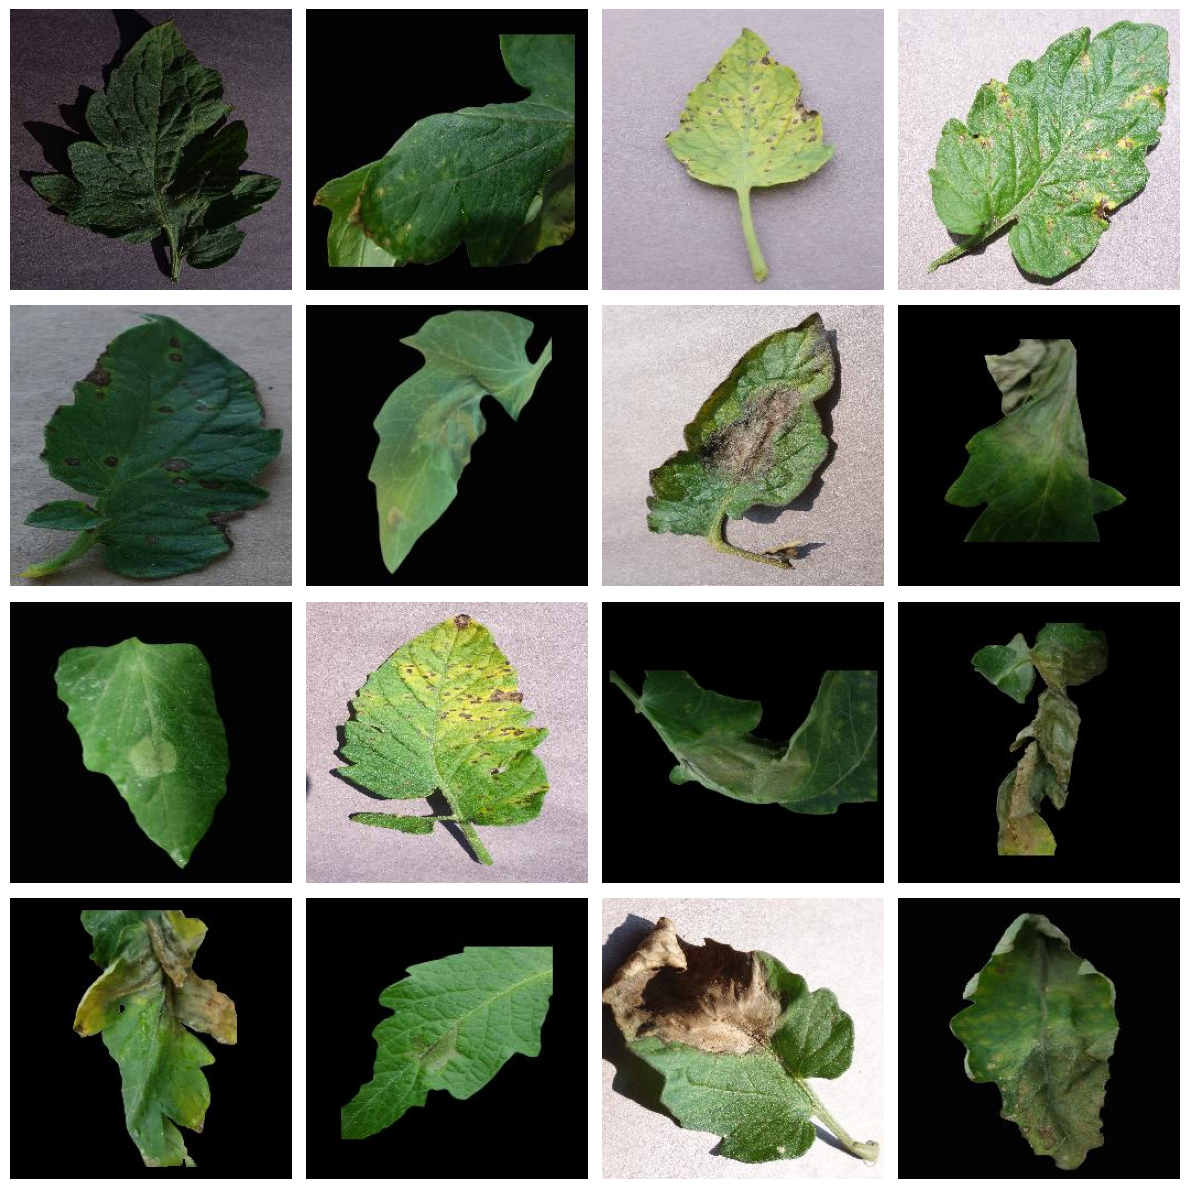

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Suponemos que ya tienes el dataframe 'df_medians' con las medianas
# Usaremos 'df_medians' para filtrar outliers

# Definimos el criterio para detectar outliers
CRITERIA = 2

# Calcular el rango intercuartílico (IQR)
Q1 = df_medians['MEDIAN'].quantile(0.25)
Q3 = df_medians['MEDIAN'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar las imágenes que están fuera del rango intercuartílico
filter = (df_medians['MEDIAN'] < Q1 - CRITERIA * IQR) | (df_medians['MEDIAN'] > Q3 + CRITERIA * IQR)
filtered_df = df_medians.loc[filter, ["IMAGE_PATH"]]

# Imprimir el número de outliers encontrados
print(f"There are {len(filtered_df)} outliers")

# Tomamos una muestra aleatoria de 16 imágenes outliers para visualizarlas
sample_images = filtered_df.sample(16, random_state=42)["IMAGE_PATH"].values.tolist()

# Crear una figura y subgráficas (4x4)
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Iterar sobre las imágenes y mostrarlas en las subgráficas
for i, ax in enumerate(axs.flat):
    image = cv2.imread(sample_images[i])
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(img_rgb)
    ax.axis('off')  # Desactivar los ejes para mostrar solo la imagen

# Mostrar las imágenes
plt.tight_layout()
plt.show()


In [15]:
# Filtrar las imágenes que no son outliers
df_filter = pd.merge(df, filtered_df, on='IMAGE_PATH', how='left', indicator=True)

# Filtrar solo las filas que están solo en 'df' y no en 'filtered_df'
df_filter = df_filter[df_filter['_merge'] == 'left_only']

# Mostrar el dataframe resultante
df_filter

,CATEGORY,IMAGE_PATH,_merge
0,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...,left_only
1,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...,left_only
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...,left_only
3,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...,left_only
4,Tomato___Tomato_Yellow_Leaf_Curl_Virus,/content/tomatoleaf/tomato/train/Tomato___Toma...,left_only
...,...,...,...
9995,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...,left_only
9996,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...,left_only
9997,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...,left_only
9998,Tomato___Septoria_leaf_spot,/content/tomatoleaf/tomato/train/Tomato___Sept...,left_only


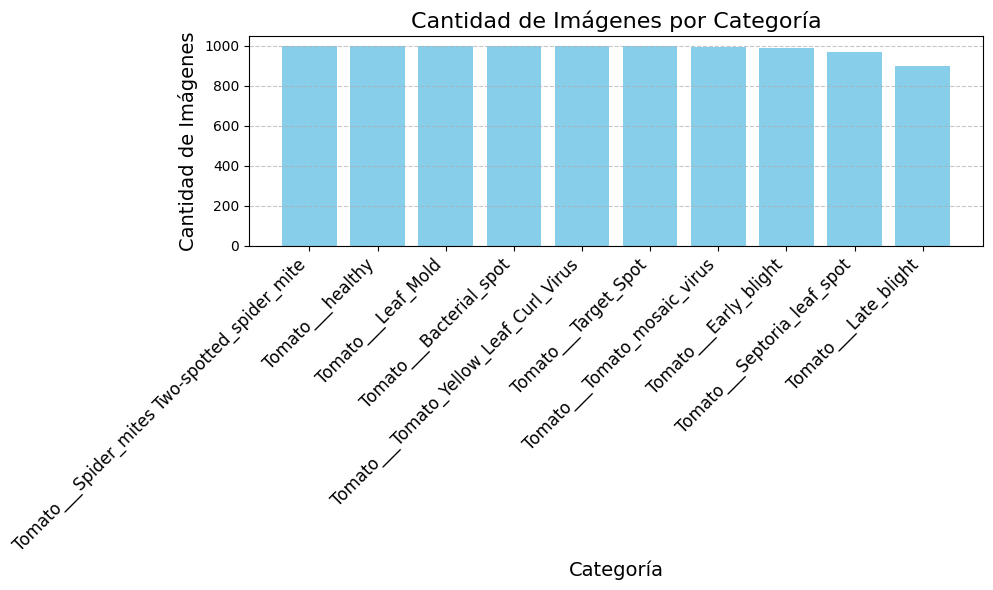

In [16]:
import matplotlib.pyplot as plt
# Contar las imágenes por categoría
value_counts = df_filter['CATEGORY'].value_counts()
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
plt.bar(value_counts.index, value_counts.values, color='skyblue')
# Personalizar el título y las etiquetas
plt.title('Cantidad de Imágenes por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad de Imágenes', fontsize=14)
# Rotar las etiquetas del eje X para mejorar la legibilidad si son largas
plt.xticks(rotation=45, ha='right', fontsize=12)
# Agregar una cuadrícula para facilitar la lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar el gráfico
plt.tight_layout()  # Asegura que los elementos no se sobrepongan
plt.show()

In [17]:
# Función para clasificar la salud de la planta
def check_health(string):
    if "healthy" in string:  # Verifica si la palabra "healthy" está en la categoría
        return "healthy"
    else:
        return "no healthy"

# Crear una nueva columna 'CATEGORY_BIN' en df o df_filter
df_transformed = df.copy()  # Usar df o df_filter, dependiendo del que tengas
df_transformed["CATEGORY_BIN"] = df_transformed["CATEGORY"].apply(lambda value: check_health(value.lower()))

# Ver los primeros registros para verificar la nueva columna
print(df_transformed.head())

                                 CATEGORY  \
0  Tomato___Tomato_Yellow_Leaf_Curl_Virus   
1  Tomato___Tomato_Yellow_Leaf_Curl_Virus   
2  Tomato___Tomato_Yellow_Leaf_Curl_Virus   
3  Tomato___Tomato_Yellow_Leaf_Curl_Virus   
4  Tomato___Tomato_Yellow_Leaf_Curl_Virus   

                                          IMAGE_PATH CATEGORY_BIN  
0  /content/tomatoleaf/tomato/train/Tomato___Toma...   no healthy  
1  /content/tomatoleaf/tomato/train/Tomato___Toma...   no healthy  
2  /content/tomatoleaf/tomato/train/Tomato___Toma...   no healthy  
3  /content/tomatoleaf/tomato/train/Tomato___Toma...   no healthy  
4  /content/tomatoleaf/tomato/train/Tomato___Toma...   no healthy  


In [18]:
import plotly.express as px

# Contar las imágenes en cada categoría binaria
category_counts = df_transformed.groupby("CATEGORY_BIN").size().reset_index(name="COUNT")

# Crear el gráfico de barras
fig = px.bar(category_counts,
             x="CATEGORY_BIN",
             y="COUNT",
             title="Distribution of Images by Health Status",  # Título del gráfico
             labels={"CATEGORY_BIN": "Health Status", "COUNT": "Number of Images"},  # Etiquetas de los ejes
             color="CATEGORY_BIN",  # Usar color para diferenciar las categorías
             color_discrete_map={"healthy": "green", "no healthy": "red"})  # Colores personalizados para las categorías

# Mostrar el gráfico
fig.show()


In [19]:
# Saving dataframe as csv
df_transformed.to_csv("transformed_categories.csv", index=False)